In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

table = pd.read_csv("/home/guillaume/Desktop/Spring Semester/IEOR 256 Healthcare/Project/Data/CSV/doc_in_dist_enspec.csv")
poptable = pd.read_csv("/home/guillaume/Desktop/Spring Semester/IEOR 256 Healthcare/Project/Data/CSV/Wienn_demo_data.csv")
df = pd.DataFrame(table)
popdf = pd.DataFrame(poptable)



def changespecs(a):
    enval = a["FACH_en"]
    if "Internal medicine" in enval:
        val = "Internal Medicine"
    else:
        if "Children" in enval:
            val = "Child and youth healing"
        else:
            if "Allgemeine" in enval:
                val = "General surgery"
            else:
                if "Radiology" in enval:
                    val = "Radiology"
                else:
                    if "Psychiatry" in enval:
                        val = "Psychiatry"
                    else:
                        if "Orthopedics" in enval:
                            val = "Orthopedics"
                        else:
                            if "Neuro" in enval:
                                val = "Neurology"
                            else:
                                val = enval
    return val


print(popdf[popdf['Unnamed: 0']=="Neubau"])

  Unnamed: 0    14  15-19  30-44  45-59  60-74    75
6     Neubau  3253   7189   8192   6193   4467  2287


In [154]:

df2 = df
df2["FACH_en_2"] = df.apply(changespecs, axis=1)
# print(len(df.index))
df3 = df2.groupby(["FACH_en_2"]).size()
df4 = df3[df3 > 170]
# for i in df4.index:
#     print(i)
# print(df4)
suma = 0
for row in df4:
    suma += row
# print(suma)
# a = translator.translate("spring",dest="en").text
#df2.to_csv("../Data/CSV/doc_in_dist_enspec.csv",index=False)

['Child and youth healing_d', 'General medicine_d', 'General surgery_d', 'Gynecology and obstetrics_d', 'Internal Medicine_d', 'Neck, nose and ear medicine_d', 'Neurology_d', 'Ophthalmology u. Optometry_d', 'Orthopedics_d', 'Psychiatry_d', 'Skin and.Symphose diseases_d']


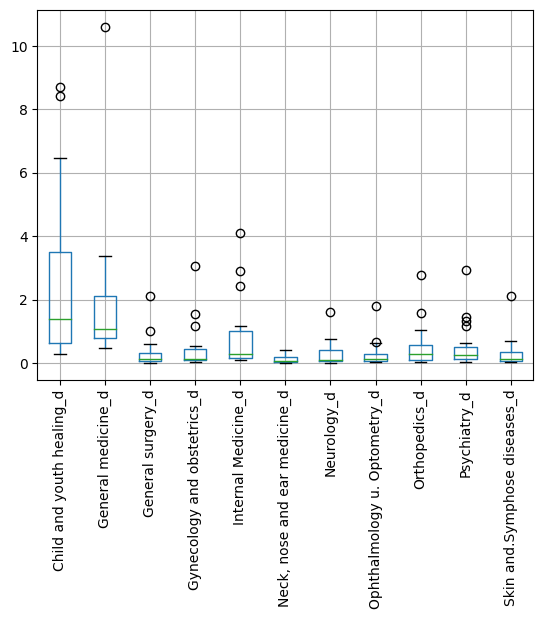

In [155]:
popdf_here = popdf
def getspecounts(x):
    countsl = []
    for i in df4.index:
        if i == "Child and youth healing":
            pop = x["14"]
        else:
            if i == "General medicine":
                pop = x['15-19']+ x['30-44']+x['45-59']+x['60-74']+x['75']
            else:
                pop = x["14"]+x['15-19']+ x['30-44']+x['45-59']+x['60-74']+x['75']
        tempdf = df2[df2["FACH_en_2"] == i]
        tempdf = tempdf[tempdf["District"]==x["Unnamed: 0"]]
        countsl.append(len(tempdf)/pop*1000)

    return countsl
espsl = []
for i in df4.index:
    val = i+"_d"
    espsl.append(val)
print(espsl)
popdf_here[espsl] = popdf.apply(getspecounts,axis=1).tolist()
#print(popdf)
popdf_here.boxplot(column=espsl)
plt.xticks(rotation=90)
plt.show()

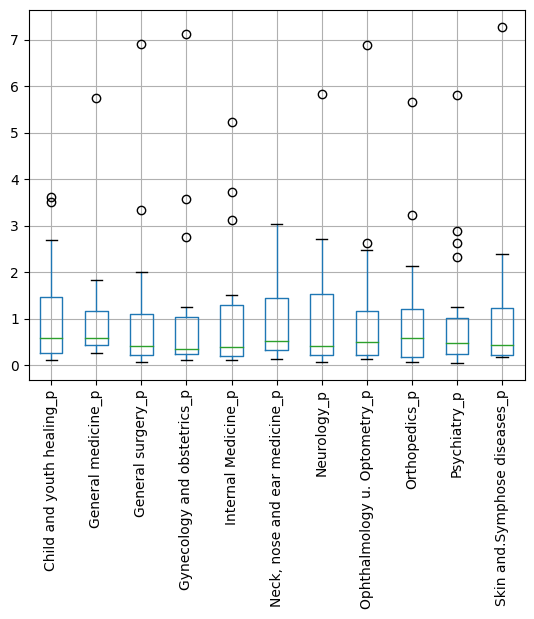

In [156]:
popdf_here2 = popdf
avgs = []
for i in df4.index:
    val = i+"_d"
    avgs.append(sum(popdf_here[val].values.tolist())/23)

def getspecounts2(x):
    countsl = []
    for i in range(len(df4.index)):
        if df4.index[i] == "Child and youth healing":
            pop = x["14"]
        else:
            if df4.index[i] == "General medicine":
                pop = x['15-19']+ x['30-44']+x['45-59']+x['60-74']+x['75']
            else:
                pop = x["14"]+x['15-19']+ x['30-44']+x['45-59']+x['60-74']+x['75']
        tempdf = df2[df2["FACH_en_2"] == df4.index[i]]
        tempdf = tempdf[tempdf["District"]==x["Unnamed: 0"]]
        countsl.append((len(tempdf)/pop*1000)/avgs[i])

    return countsl
esp2l = []
for i in df4.index:
    val = i+"_p"
    esp2l.append(val)
#print(espsl)
popdf_here2[esp2l] = popdf.apply(getspecounts2,axis=1).tolist()
#print(popdf)
popdf_here2.boxplot(column=esp2l)
plt.xticks(rotation=90)
plt.show()

{'Alsergrund': [[16.3419883, 48.2172473], [16.3419295, 48.2171389], [16.3418868, 48.217149], [16.3418711, 48.2171192], [16.3418696, 48.2171167], [16.3418648, 48.2171084], [16.3418255, 48.2170374], [16.3418242, 48.217035], [16.3417738, 48.2170469], [16.3417586, 48.2170185], [16.3416788, 48.2168729], [16.3416627, 48.2168435], [16.341649, 48.2168178], [16.3415693, 48.2166687], [16.3415681, 48.2166664], [16.341553, 48.216638], [16.3416037, 48.2166264], [16.3416022, 48.2166236], [16.3415577, 48.2165399], [16.3415563, 48.2165373], [16.3415404, 48.2165076], [16.3415823, 48.2164976], [16.3415865, 48.2164966], [16.3415958, 48.2164945], [16.3415867, 48.2164779], [16.3415294, 48.216373], [16.3415085, 48.2163349], [16.3414721, 48.2162683], [16.3412458, 48.2158543], [16.3412026, 48.2157703], [16.3409357, 48.2152918], [16.3408703, 48.2151672], [16.3408703, 48.2151672], [16.3433909, 48.2152357], [16.3440565, 48.2152535], [16.3454822, 48.2152992], [16.345681, 48.2153196], [16.3460314, 48.2153636], [16

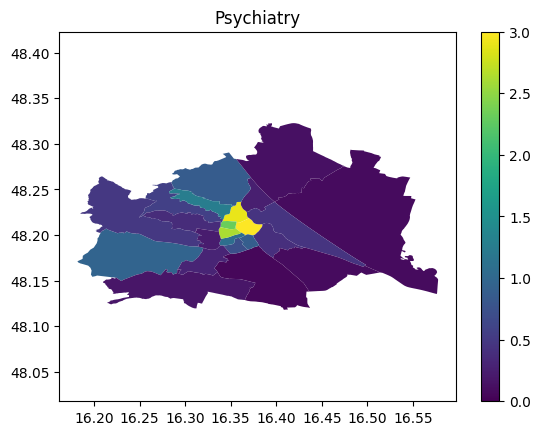

In [175]:
import geopandas as gpd
from shapely.geometry import Polygon
import ast

with open("/home/guillaume/Desktop/Spring Semester/IEOR 256 Healthcare/Project/Data/Json/FinalMarkers", 'r') as f2:
    data = f2.read()

districts = ["Alsergrund", "Brigittenau", "Döbling", "Donaustadt","Favoriten","Floridsdorf","Hernals","Hietzing","Innere Stadt","Josefstadt","Landstraße","Leopoldstadt","Liesing","Margareten","Mariahilf","Meidling","Neubau","Ottakring","Penzing","Rudolfsheim-Fünfhaus","Simmering","Währing","Wieden"]

# Plotting the polygon with transparency
fig, ax = plt.subplots()
data = ast.literal_eval(data)

for i in districts:
    data[i] = [[j[1],j[0]] for j in data[i]]
print(data)
data2 = data
l = []
esp = esp2l[9]
vals = []
for i in districts:
    if i =='Innere Stadt':
        #vals.append(1)
        vals.append(popdf_here2[popdf_here2['Unnamed: 0']==i][esp].values[0])
    else:
        vals.append(popdf_here2[popdf_here2['Unnamed: 0']==i][esp].values[0])

# Define the polygons and associated values
plist = [Polygon(data[i]) for i in districts]
print(vals)
data = {
    'geometry': plist,
    'value': vals
}
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Set the geometry column explicitly
gdf.set_geometry('geometry', inplace=True)
# Plot the choropleth map
gdf.plot(column='value', cmap='viridis', ax=ax, legend=True, vmax=3, vmin=0)
plt.title(esp[:-2])
plt.axis('equal')
plt.show()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


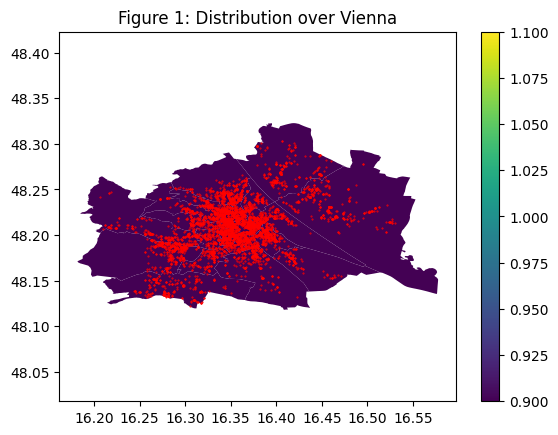

In [176]:
# Plotting the polygon with transparency
fig, ax = plt.subplots()
l = []
esp = esp2l[3]
vals = [1]*len(districts)

# Define the polygons and associated values

print(vals)
data = {
    'geometry': plist,
    'value': vals
}
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Set the geometry column explicitly
gdf.set_geometry('geometry', inplace=True)
# Plot the choropleth map
gdf.plot(column='value', cmap='viridis', ax=ax, legend=True)
y = []
x = []
for i,row in df.iterrows():
    temp = row["SHAPE"].replace("POINT (","").replace(")","").split(" ")
    y.append(float(temp[0]))
    x.append(float(temp[1]))
plt.scatter(y,x,c="red",s=0.2)
plt.title("Figure 1: Distribution over Vienna")
plt.axis('equal')
plt.show()

[675, 133, 655, 357, 253, 253, 221, 457, 678, 408, 350, 305, 248, 171, 226, 199, 262, 194, 264, 142, 117, 448, 199]


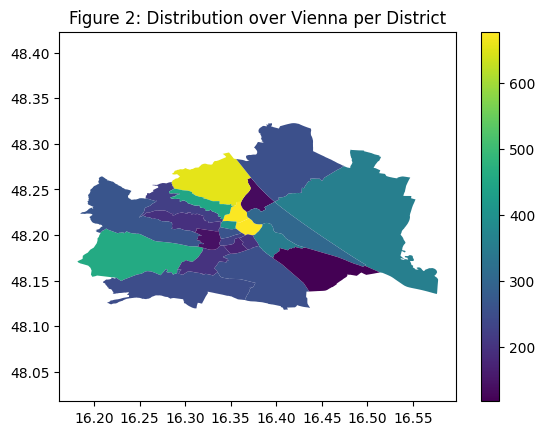

In [177]:
# Plotting the polygon with transparency
fig, ax = plt.subplots()
l = []
esp = esp2l[3]

vals = []
for d in districts:
    temp = len(df[df["District"]==d])
    vals.append(temp)

# Define the polygons and associated values

print(vals)

data = {
    'geometry': plist,
    'value': vals
}
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Set the geometry column explicitly
gdf.set_geometry('geometry', inplace=True)
# Plot the choropleth map
gdf.plot(column='value', cmap='viridis', ax=ax, legend=True)

plt.title("Figure 2: Distribution over Vienna per District")
plt.axis('equal')
plt.show()

[42206]
[85690]
[75517]
[212658]
[218415]
[183895]
[56033]
[55568]
[16620]
[24674]
[96756]
[108269]
[117882]
[55018]
[31423]
[100281]
[31581]
[102444]
[96828]
[76109]
[109038]
[51559]
[33633]


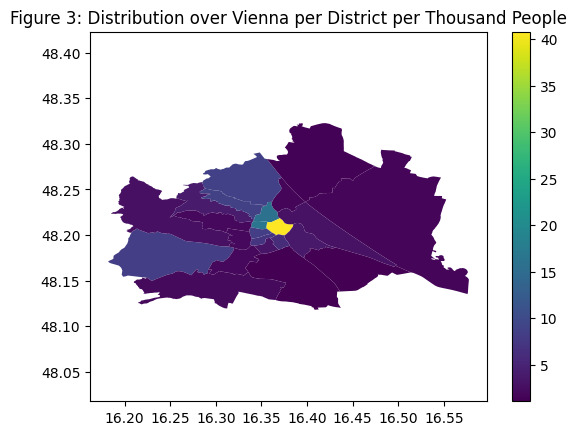

In [178]:
fig, ax = plt.subplots()
l = []
esp = esp2l[3]

vals = []
for d in districts:
    temp = len(df[df["District"]==d])
    popc = popdf[popdf["Unnamed: 0"]==d]["14"].values+popdf[popdf["Unnamed: 0"]==d]['15-19'].values+ popdf[popdf["Unnamed: 0"]==d]['30-44'].values+popdf[popdf["Unnamed: 0"]==d]['45-59'].values+popdf[popdf["Unnamed: 0"]==d]['60-74'].values+popdf[popdf["Unnamed: 0"]==d]['75'].values
    print(popc)
    vals.append(temp/popc[0]*1000)

# Define the polygons and associated values
#print(vals)

data = {
    'geometry': plist,
    'value': vals
}
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Set the geometry column explicitly
gdf.set_geometry('geometry', inplace=True)
# Plot the choropleth map
gdf.plot(column='value', cmap='viridis', ax=ax, legend=True)

plt.title("Figure 3: Distribution over Vienna per District per Thousand People")
plt.axis('equal')
plt.show()

In [179]:
popdf_here3 = popdf_here2[esp2l]
pop4 = popdf_here2[['Unnamed: 0']+esp2l]
def zer(x):
    return 0
for i in esp2l:
    pop4[i] = pop4.apply(zer, axis=1)
arr = popdf_here3.to_numpy()
#print(arr)
n = 100
for i in range(n):
    val = np.where(arr == np.min(arr))
    #print(districts[val[0][0]]+": "+esp2l[val[1][0]])
    arr[val[0][0],val[1][0]]+=1/avgs[val[1][0]]
    pop4.loc[val[0][0],esp2l[val[1][0]]] = 1+pop4.loc[val[0][0],esp2l[val[1][0]]]



/tmp/ipykernel_7421/964156403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop4[i] = pop4.apply(zer, axis=1)


[[16.3724028, 48.2627227], [16.3763322, 48.258047], [16.3787118, 48.2552352], [16.3807789, 48.2530063], [16.382872, 48.2507939], [16.3838591, 48.2497632], [16.3848614, 48.2487412], [16.3854004, 48.248205], [16.390506, 48.2432219], [16.3942444, 48.2397528], [16.398134, 48.2363479], [16.398134, 48.2363479], [16.3952727, 48.2348255], [16.3952727, 48.2348255], [16.3952832, 48.2348168], [16.3928763, 48.2335545], [16.3923408, 48.2332751], [16.3900552, 48.2320872], [16.3892605, 48.2316746], [16.3874115, 48.2307192], [16.3874126, 48.2307099], [16.387021, 48.2305039], [16.3867834, 48.2303683], [16.3879148, 48.2293718], [16.3881807, 48.2281664], [16.3880499, 48.2280722], [16.3879758, 48.2279555], [16.3879656, 48.2278318], [16.3847, 48.2260849], [16.3833445, 48.2256078], [16.3833051, 48.2256004], [16.3832676, 48.2255961], [16.3832231, 48.2255989], [16.3831846, 48.2256042], [16.383138, 48.2256194], [16.383103, 48.2256355], [16.383074, 48.2256566], [16.383051, 48.2256828], [16.3813061, 48.2279137],

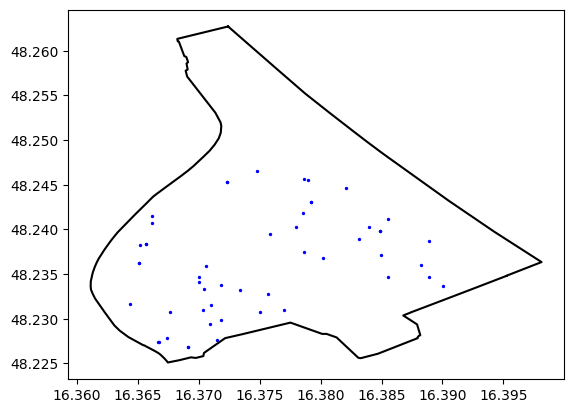

In [202]:
l = data2["Brigittenau"]
print(l)
x = []
y = []
for i in l:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c="k")
dfbrig_psych = df2[df2["District"]=="Brigittenau"]
#print(dfbrig_psych)
dfbrig_psych = dfbrig_psych[dfbrig_psych["FACH_en_2"]=="General medicine"]
x = []
y = []
for i,row in dfbrig_psych.iterrows():
    temp = row["SHAPE"].replace("POINT (","").replace(")","").split(" ")
    x.append(float(temp[0]))
    y.append(float(temp[1]))
plt.scatter(x,y,c="b",s=2)
xr = [16.3825,16.3722,16.3753]
yr = [48.23125,48.241,48.2534]
# plt.scatter(xr,yr,c="r",s=3)
plt.show()


#plt.show()

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.termination import get_termination

class Projection(Problem):

    def __init__(self,n_var):
        super().__init__(n_var=total_w_and_b, n_obj=1, n_eq_constr=0, xl=[-1]*total_w_and_b, xu=[1]*total_w_and_b)

    def _evaluate(self, x, out, *args, **kwargs):
        
        f1 = []
        for ind in x:
            r = 0
            for index, row in train_data.iterrows():    
                p = get_price(ind,row)
                r += -ind_rev(p,row)
            f1.append(r)
        print(len(f1))
        out["F"] = f1

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

problem = Projection(total_w_and_b)
termination = get_termination("n_gen",400)
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               verbose=True)

\begin{tabular}{lrrrrrrrrrrr}
\toprule
Unnamed: 0 & Child and youth healing_p & General medicine_p & General surgery_p & Gynecology and obstetrics_p & Internal Medicine_p & Neck, nose and ear medicine_p & Neurology_p & Ophthalmology u. Optometry_p & Orthopedics_p & Psychiatry_p & Skin and.Symphose diseases_p \\
\midrule
Innere Stadt & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Leopoldstadt & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 \\
Landstraße & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Wieden & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Margareten & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Mariahilf & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Neubau & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Josefstadt & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Alsergrund & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
Favoriten & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
Simmering & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
Meidling & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 